# Load the necessary liabraries

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [114]:
df=pd.read_csv('Disease_symptom_and_patient_profile_dataset.csv')
df.head(10)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
6,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
7,Influenza,Yes,Yes,Yes,Yes,25,Female,Normal,Normal,Positive
8,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative
9,Hyperthyroidism,No,Yes,No,No,28,Female,Normal,Normal,Negative


In [94]:
df['Disease'].value_counts()

Disease
Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: count, Length: 116, dtype: int64

In [19]:
df['Disease'].unique()

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


In [21]:
df['Age'].value_counts()

Age
45    36
35    36
50    31
40    26
55    25
30    25
60    25
65    19
42    15
38    14
70    13
29    11
25     5
31     4
48     2
52     2
28     2
85     1
80     1
19     1
57     1
56     1
43     1
39     1
32     1
90     1
Name: count, dtype: int64

In [22]:
df['Age'].unique()

array([19, 25, 28, 29, 30, 31, 32, 35, 38, 39, 40, 42, 43, 45, 48, 50, 52,
       55, 56, 57, 60, 65, 70, 80, 85, 90], dtype=int64)

# check the shape of data set

In [4]:
df.shape

(349, 10)

###### Number of rows=349
###### Number of columns=10

# Data Preprocessing

## Handling Null value

In [5]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

# Fetch the duplicate value

In [95]:
df.duplicated().sum()

49

# Drop duplicate value

In [115]:
df.drop_duplicates(inplace=True)
df.shape

(300, 10)

# check the Data type 

In [97]:
df.dtypes

Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object

# check the statistical nature of numerical value in data set

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,300.0,45.756667,12.596548,19.0,35.0,45.0,55.0,90.0


# fetch the description about dataset

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               300 non-null    object
 1   Fever                 300 non-null    object
 2   Cough                 300 non-null    object
 3   Fatigue               300 non-null    object
 4   Difficulty Breathing  300 non-null    object
 5   Age                   300 non-null    int64 
 6   Gender                300 non-null    object
 7   Blood Pressure        300 non-null    object
 8   Cholesterol Level     300 non-null    object
 9   Outcome Variable      300 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.8+ KB


# seperate the categorical column and numerical column from data set

In [117]:
cat_col=df.select_dtypes(include='object').columns
num_col=df.select_dtypes(exclude='object').columns
print('categorical column',cat_col)
print('Numerical column',num_col)

categorical column Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')
Numerical column Index(['Age'], dtype='object')


In [34]:
columns=['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']

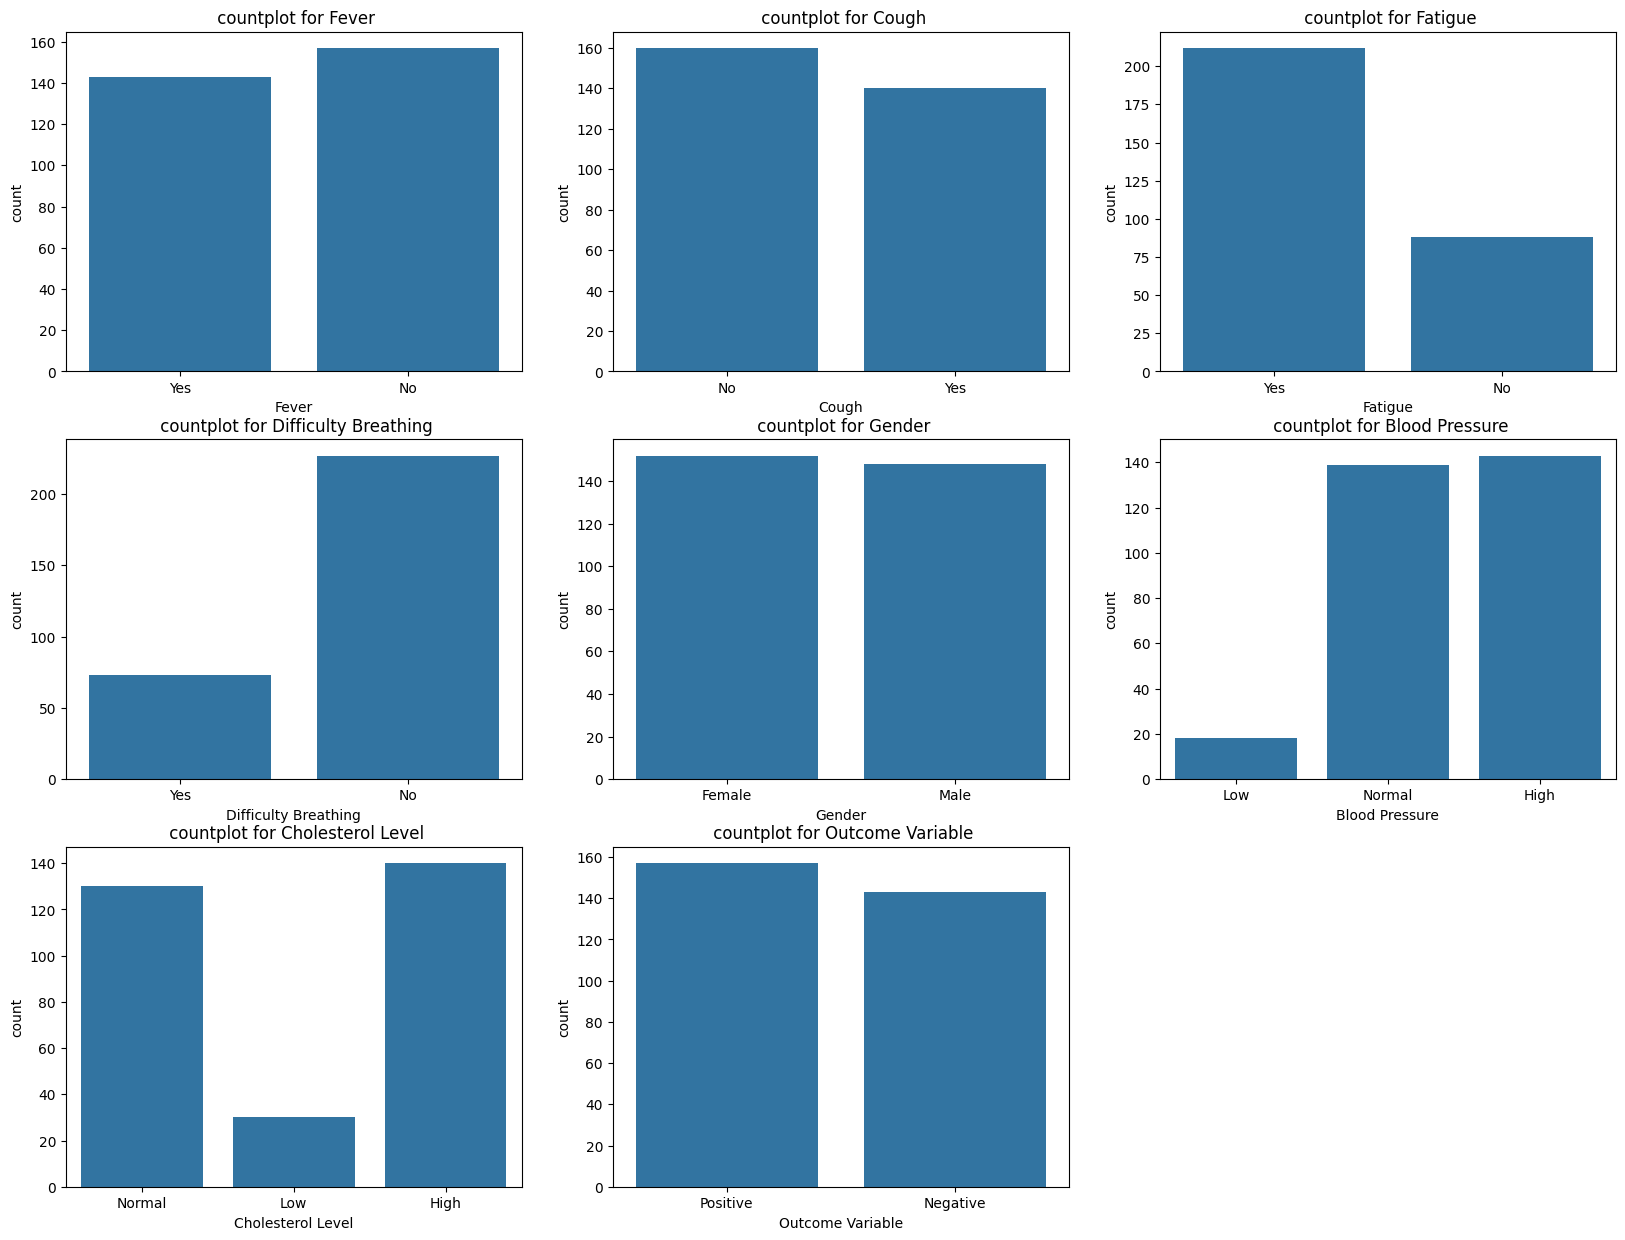

In [35]:
plt.figure(figsize=(20,15))
for i in range(len(columns)):
    plt.subplot(3,3,i+1)
    sns.countplot(x=df[columns[i]])
    plt.title(f' countplot for {columns[i]}')
plt.show()

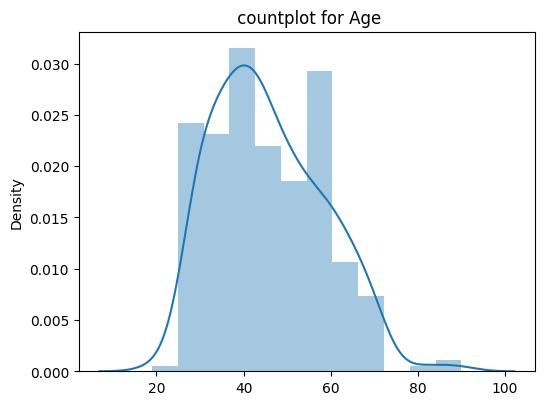

In [63]:
plt.figure(figsize=(20,15))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    sns.distplot(x=df[num_col[i]])
    plt.title(f' countplot for {num_col[i]}')
plt.show()

# outliers treatments

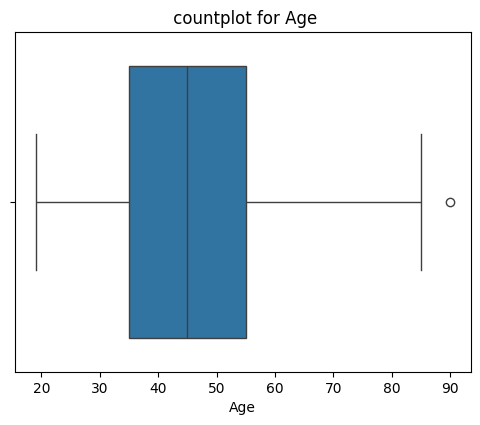

In [65]:
plt.figure(figsize=(20,15))
for i in range(len(num_col)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=df[num_col[i]])
    plt.title(f' countplot for {num_col[i]}')
plt.show()

In [76]:
a=df[num_col].describe(percentiles=[0.95,0.96,0.97,0.98,0.99]).T
a

,count,mean,std,min,50%,95%,96%,97%,98%,99%,max
Age,300.0,45.756667,12.596548,19.0,45.0,70.0,70.0,70.0,70.0,70.1,90.0


In [77]:
df1=df.copy()

# features counts

In [116]:
for i in cat_col:
    print(f' fetaures {i}')
    print(df[i].value_counts())
    print('*'*30)

 fetaures Disease
Disease
Asthma                            16
Osteoporosis                      12
Stroke                            11
Hypertension                      10
Migraine                          10
                                  ..
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Chickenpox                         1
Rabies                             1
Williams Syndrome                  1
Name: count, Length: 116, dtype: int64
******************************
 fetaures Fever
Fever
No     157
Yes    143
Name: count, dtype: int64
******************************
 fetaures Cough
Cough
No     160
Yes    140
Name: count, dtype: int64
******************************
 fetaures Fatigue
Fatigue
Yes    212
No      88
Name: count, dtype: int64
******************************
 fetaures Difficulty Breathing
Difficulty Breathing
No     227
Yes     73
Name: count, dtype: int64
******************************
 fetaures Gender
Gender
Female    152
Male      148
Name: c

# Encoding categorical features

In [119]:
from sklearn.preprocessing import LabelEncoder
for i in cat_col:
    lb=LabelEncoder()
    df[i]=lb.fit_transform(df[i])
    

In [120]:
df.dtypes

Disease                 int32
Fever                   int32
Cough                   int32
Fatigue                 int32
Difficulty Breathing    int32
Age                     int64
Gender                  int32
Blood Pressure          int32
Cholesterol Level       int32
Outcome Variable        int32
dtype: object

In [121]:
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,1,0,1,1,19,0,1,2,1
1,24,0,1,1,0,25,0,2,2,0
2,37,0,1,1,0,25,0,2,2,0
3,6,1,1,0,1,25,1,2,2,1
5,37,1,0,0,0,25,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...
341,106,1,1,1,0,70,0,0,0,1
342,114,0,0,1,0,70,0,2,2,1
343,101,1,0,1,0,80,0,0,0,1
345,101,1,0,1,0,85,1,0,0,1


# select independent and dependent variable

In [122]:
x=df.drop('Outcome Variable',axis=1)
y=df['Outcome Variable']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(300, 9)
(300,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


# split the data into training and testing data

In [123]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(210, 9)
(90, 9)
(210,)
(90,)


# create a function to evaluate model performance

In [134]:
from sklearn.metrics import *
def eval_model(model,x_train,x_test,y_train,y_test,mname):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    Training_score=model.score(x_train,y_train)
    Testing_score=model.score(x_test,y_test)
    cm=confusion_matrix(y_test,ypred)
    print('confusion matrix',cm)
    print('Accuracy_score',accuracy_score(y_test,ypred))
    print('classification report',classification_report(y_test,ypred))
    res=pd.DataFrame({'Training_score':Training_score,'Testing_score':Testing_score},index=[mname])
    return res,ypred
    

# import ML model

In [131]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

# Logistic Regression

In [135]:
log_reg=LogisticRegression(max_iter=1000,solver='liblinear')
log_reg_res,log_res_ypred=eval_model(log_reg,x_train,x_test,y_train,y_test,'Log_Reg')
log_reg_res

confusion matrix [[28 12]
 [13 37]]
Accuracy_score 0.7222222222222222
classification report               precision    recall  f1-score   support

           0       0.68      0.70      0.69        40
           1       0.76      0.74      0.75        50

    accuracy                           0.72        90
   macro avg       0.72      0.72      0.72        90
weighted avg       0.72      0.72      0.72        90



,Training_score,Testing_score
Log_Reg,0.642857,0.722222


# DT model

In [136]:
dt=DecisionTreeClassifier(max_depth=12,min_samples_split=10)
dt_res,dt_ypred=eval_model(dt,x_train,x_test,y_train,y_test,'Decision_tree')
dt_res

confusion matrix [[25 15]
 [11 39]]
Accuracy_score 0.7111111111111111
classification report               precision    recall  f1-score   support

           0       0.69      0.62      0.66        40
           1       0.72      0.78      0.75        50

    accuracy                           0.71        90
   macro avg       0.71      0.70      0.70        90
weighted avg       0.71      0.71      0.71        90



,Training_score,Testing_score
Decision_tree,0.890476,0.711111


# RF model

In [137]:
rf=RandomForestClassifier(n_estimators=80,max_depth=12,min_samples_split=10)
rf_res,rf_ypred=eval_model(rf,x_train,x_test,y_train,y_test,'Random_forest')
rf_res

confusion matrix [[27 13]
 [11 39]]
Accuracy_score 0.7333333333333333
classification report               precision    recall  f1-score   support

           0       0.71      0.68      0.69        40
           1       0.75      0.78      0.76        50

    accuracy                           0.73        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.73      0.73      0.73        90



,Training_score,Testing_score
Random_forest,0.904762,0.733333


# ADBoost model

In [138]:
ad=AdaBoostClassifier(n_estimators=80,estimator=dt)
ad_res,ad_ypred=eval_model(ad,x_train,x_test,y_train,y_test,'AdaBoost')
ad_res

confusion matrix [[25 15]
 [10 40]]
Accuracy_score 0.7222222222222222
classification report               precision    recall  f1-score   support

           0       0.71      0.62      0.67        40
           1       0.73      0.80      0.76        50

    accuracy                           0.72        90
   macro avg       0.72      0.71      0.71        90
weighted avg       0.72      0.72      0.72        90



,Training_score,Testing_score
AdaBoost,1.0,0.722222


# Inference 

#### The best model is Decision Tree Classifier

# save the model

In [139]:
import pickle

In [140]:
pickle.dump(log_reg,open('log_reg_model_disease_prediction.pkl','wb'))
pickle.dump(dt,open('dt_model_disease_prediction.pkl','wb'))
pickle.dump(rf,open('rf_model_disease_prediction.pkl','wb'))
pickle.dump(ad,open('adboost_model_disease_prediction.pkl','wb'))